In [1]:
import lzma
from pathlib import Path

In [2]:
import dill as pickle
import numpy as np
from corner import corner
from matplotlib import pyplot as plt

In [3]:
import elm

Using database version X4-2024-12-31 located in: /mnt/home/beyerkyl/x4db/unpack_exfor-2024/X4-2024-12-31


In [4]:
with open("../prior/prior_distribution.pickle", "rb") as f:
    prior = pickle.load(f)
prior_samples = prior.rvs(100000)

In [5]:
with lzma.open("../calibration/walker.xz") as f:
    walker = pickle.load(f)

In [6]:
results = np.load("../calibration/0_elm_og_cal_result.npz")

In [7]:
results_full = np.load("../calibration/elm_og_cal_result.npz")

In [8]:
n_chains, n_steps, n_params = results_full["model_chains"].shape
(n_chains, n_steps, n_params)

(64, 100000, 14)

In [9]:
results_full["model_chains"].shape

(64, 100000, 14)

In [10]:
chains = results_full["model_chains"]

In [11]:
logp = results_full["log_likelihoods"]

## Chains

Text(0.5, 0, '$i$')

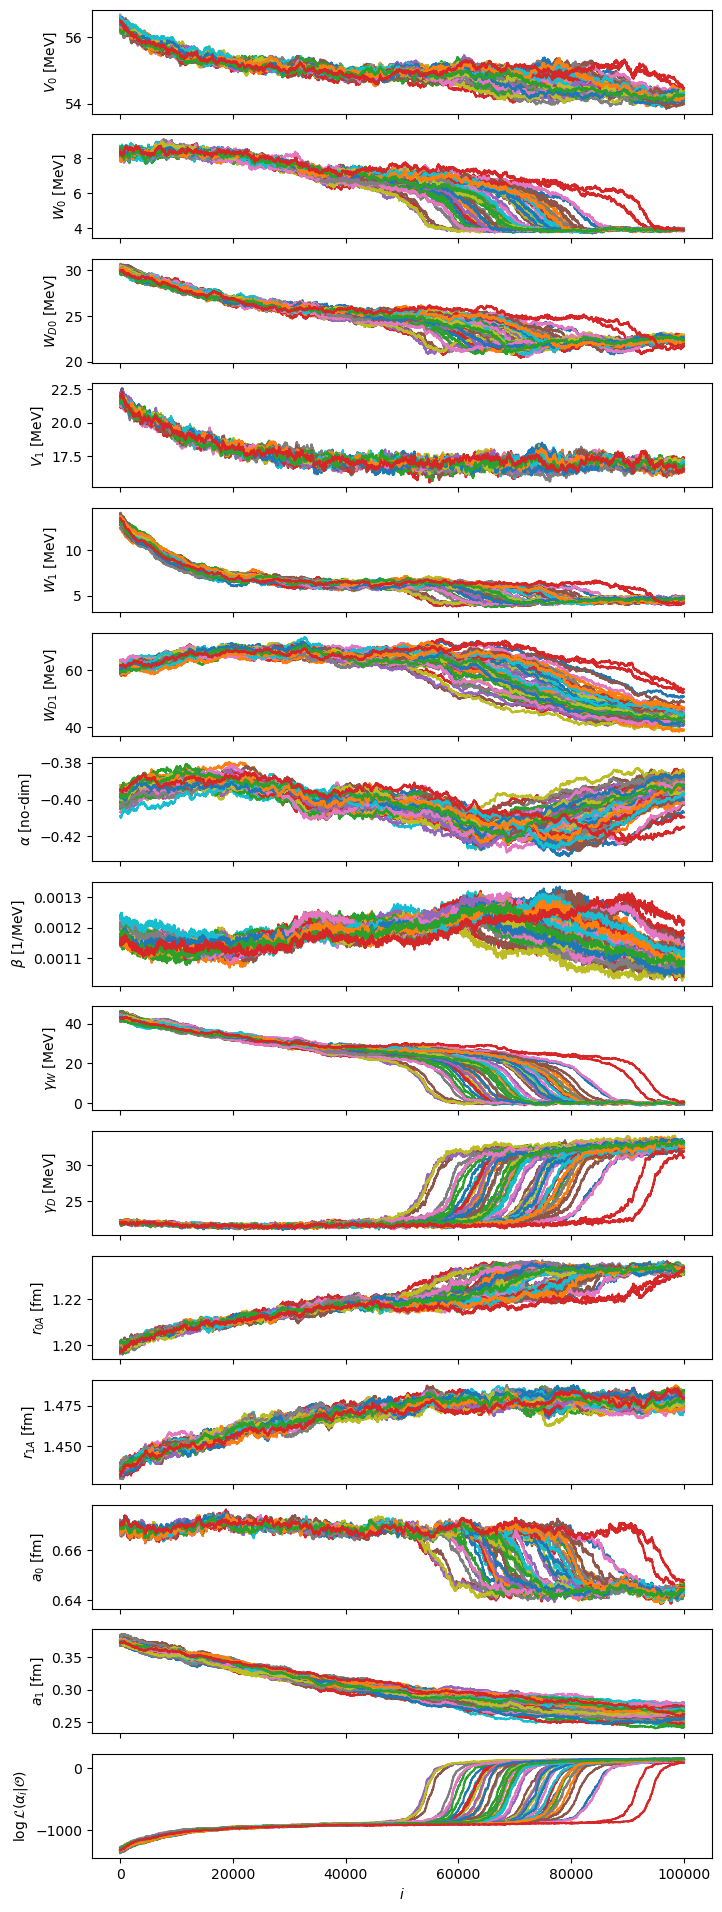

In [12]:
fig, axes = plt.subplots(chains.shape[2] + 1, 1, figsize=(8, 24), sharex=True)
for i in range(chains.shape[2]):
    for chain in range(chains.shape[0]):
        axes[i].plot(chains[chain, :, i])
        axes[i].set_ylabel(f"${elm.params[i].latex_name}$ [{elm.params[i].unit}]")


for chain in range(chains.shape[0]):
    axes[-1].plot(logp[chain, ...], label=f"{chain}")
    axes[-1].set_ylabel(r"$\log{\mathcal{L}(\alpha_i | \mathcal{O})}$")

axes[-1].set_xlabel(r"$i$")

## Corner plot

In [13]:
def draw_samples(x, low_cut=None, high_cut=None, n_samples=None):
    chains, steps, n_params = x.shape
    if low_cut is None:
        low_cut = 0
    if high_cut is None:
        high_cut = steps - 1
    samples = x[:, low_cut:high_cut, ...].reshape(
        (chains * (high_cut - low_cut), n_params)
    )
    if n_samples is None:
        return samples
    else:
        return samples[
            np.random.choice(np.arange(chains * (high_cut - low_cut)), n_samples), ...
        ]

In [14]:
def print_summary(x):
    x0 = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    for p, m, s in zip(elm.params, x0, std):
        print(f"{p.name:10} {m:1.2f} +/- {s:1.6f} {p.unit}")

In [15]:
chain_0 = draw_samples(results["model_chains"], low_cut=3000)
chain_0_from_full = draw_samples(
    results_full["model_chains"], low_cut=20000, high_cut=40000
)

chain_full = draw_samples(results_full["model_chains"], low_cut=10000, n_samples=10000)
chain_final = draw_samples(results_full["model_chains"], low_cut=98000)

In [16]:
print_summary(chain_0_from_full)

V0         55.08 +/- 0.135251 MeV
W0         7.52 +/- 0.430919 MeV
Wd0        25.88 +/- 0.528726 MeV
V1         17.45 +/- 0.423185 MeV
W1         6.53 +/- 0.353071 MeV
Wd1        66.12 +/- 1.352617 MeV
alpha      -0.40 +/- 0.005380 no-dim
beta       0.00 +/- 0.000028 1/MeV
gamma_w    29.86 +/- 2.321576 MeV
gamma_d    21.50 +/- 0.165053 MeV
r0A        1.21 +/- 0.002548 fm
r1A        1.47 +/- 0.004630 fm
a0         0.67 +/- 0.001371 fm
a1         0.32 +/- 0.010275 fm


In [17]:
print_summary(chain_0)

V0         56.41 +/- 0.281981 MeV
W0         8.19 +/- 0.243923 MeV
Wd0        31.40 +/- 0.309448 MeV
V1         22.35 +/- 1.157298 MeV
W1         15.27 +/- 1.409798 MeV
Wd1        59.96 +/- 2.489752 MeV
alpha      -0.40 +/- 0.005023 no-dim
beta       0.00 +/- 0.000025 1/MeV
gamma_w    49.39 +/- 0.824568 MeV
gamma_d    22.61 +/- 0.124747 MeV
r0A        1.20 +/- 0.001980 fm
r1A        1.43 +/- 0.009219 fm
a0         0.66 +/- 0.001838 fm
a1         0.38 +/- 0.006577 fm


In [18]:
print_summary(chain_final)

V0         54.21 +/- 0.125032 MeV
W0         3.91 +/- 0.034728 MeV
Wd0        22.34 +/- 0.263804 MeV
V1         16.76 +/- 0.251194 MeV
W1         4.61 +/- 0.166851 MeV
Wd1        43.81 +/- 2.707921 MeV
alpha      -0.39 +/- 0.005782 no-dim
beta       0.00 +/- 0.000033 1/MeV
gamma_w    0.06 +/- 0.353709 MeV
gamma_d    32.97 +/- 0.396982 MeV
r0A        1.23 +/- 0.001004 fm
r1A        1.48 +/- 0.003210 fm
a0         0.64 +/- 0.001355 fm
a1         0.26 +/- 0.008229 fm


In [19]:
labels = [f"${p.latex_name}$" for p in elm.params]

In [ ]:
fig = corner(
    chain_0,
    labels=labels,
    show_titles=True,
    title_kwargs={"fontsize": 14},
    label_kwargs={"fontsize": 20, "labelpad": 50},
    plot_density=True,
    plot_datapoints=False,
    # range=ranges,
)
fig = corner(chain_0_from_full, color="tab:blue", fig=fig)

corner(
    chain_final,
    color='tab:orange',
    fig=fig,
)